# **Data Visualization with SQL**


## Objectives


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Working with database


Download database file.


In [97]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2021-02-15 18:10:03--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.4’

m4_survey_data.sqli 100%[===================>]  34.98M  43.7MB/s    in 0.8s    

2021-02-15 18:10:04 (43.7 MB/s) - ‘m4_survey_data.sqlite.4’ saved [36679680/36679680]



Connect to the database.


In [102]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [103]:
import pandas as pd


## Demo: How to run an sql query


In [109]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [120]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [121]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [122]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

## Visualizing distribution of data


### Histograms


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5a34099910>]],
      dtype=object)

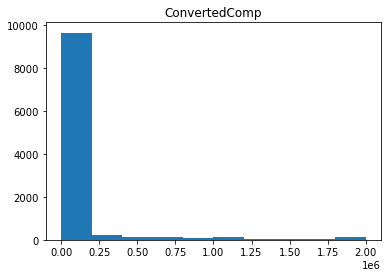

In [171]:
#Plot a histogram of ConvertedComp
QUERY = """
SELECT* FROM master
"""

df = pd.read_sql_query(QUERY,conn)
df.hist(column='ConvertedComp',grid=False)








### Box Plots


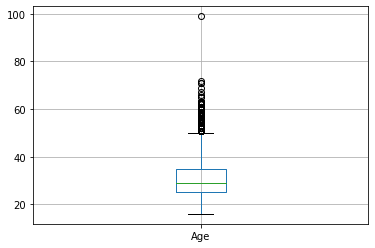

In [89]:
#Plot a box plot of Age
Query = """
SELECT* FROM master
"""
df = pd.read_sql_query(QUERY,conn)
df.boxplot(column='Age')


## Visualizing relationships in data


### Scatter Plots


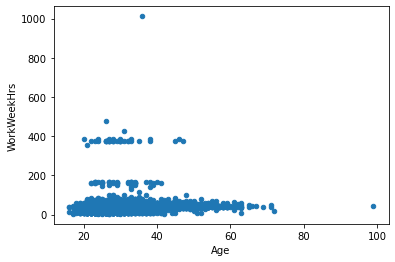

In [90]:
# Create a scatter plot of Age & WorkWeekHrs
Query = """
SELECT* FROM master
"""
df = pd.read_sql_query(QUERY,conn)
df.plot(x='Age',y='WorkWeekHrs',kind='scatter')


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


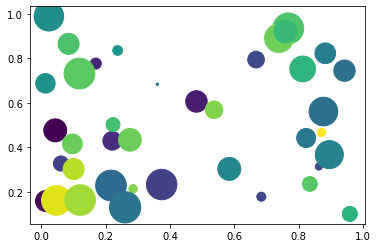

In [91]:
#Create a bubble plot of WorkWeekHrs and CodeRevHrs, using Age column as bubble size 
import matplotlib.pyplot as plt
import numpy as np

Query = """
SELECT WorkWeekHrs,CodeRevHrs,Age
FROM master
"""
df = pd.read_sql_query(QUERY,conn)
# create data
x = np.random.rand(40)
y = np.random.rand(40)
z = np.random.rand(40)
colors = np.random.rand(40) 
# use the scatter function
plt.scatter(x, y, s=z*1000,c=colors) 
plt.show()


## Visualizing composition of data


### Pie Charts


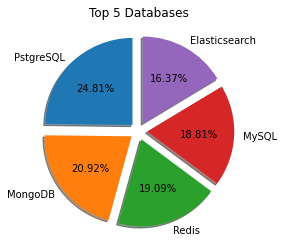

In [92]:
#pie chart of the top 5 databases that respondents wish to learn next year.
QUERY = """

select count(DatabaseDesireNextYear) as Count,DatabaseDesireNextYear from DatabaseDesireNextYear group by DatabaseDesireNextYear order by count(DatabaseDesireNextYear) DESC LIMIT 5

"""

df2=pd.read_sql_query(QUERY,conn)

df2.set_index('DatabaseDesireNextYear',inplace=True)

df2

labels= ['PstgreSQL','MongoDB','Redis','MySQL','Elasticsearch']
sizes=df2.iloc[:,0]
plt.pie(sizes,labels=labels,startangle=90,shadow=True,explode=(0.1,0.1,0.1,0.1,0.1),autopct='%1.2f%%')
plt.title('Top 5 Databases')
plt.show()


### Stacked Charts


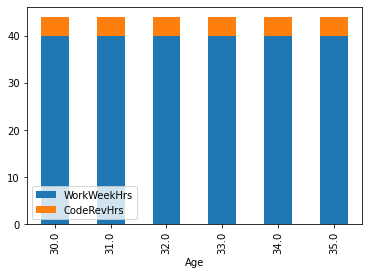

In [158]:
# stacked chart of median WorkWeekHrs and CodeRevHrs for the age group 30 to 35.
QUERY = """

SELECT WorkWeekHrs,CodeRevHrs,Age 
FROM master
WHERE Age BETWEEN 30 AND 35

"""


df_Age = pd.read_sql_query(QUERY,conn)
df_Age.head()

df_grouped=df_Age.groupby(df_Age.Age)[['WorkWeekHrs','CodeRevHrs']].median()
df_grouped.head()
df_grouped.plot(kind='bar', stacked=True)


## Visualizing comparison of data


### Line Chart


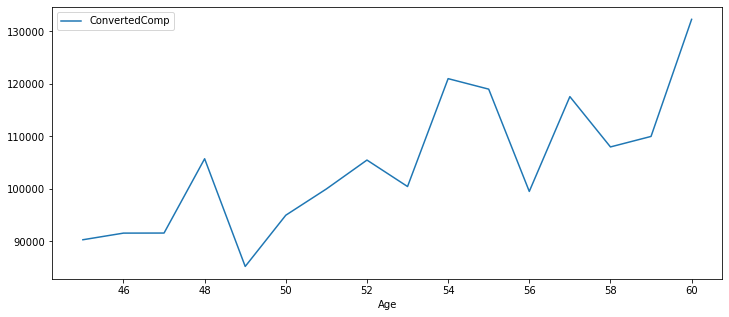

In [170]:
# Plot the median ConvertedComp for all ages from 45 to 60.
QUERY = """

SELECT ConvertedComp, Age 
FROM master
WHERE Age BETWEEN 45 AND 60

"""
df4 = pd.read_sql_query(QUERY,conn)
df4.head()
df4grouped = df4.groupby(df4.Age)[['ConvertedComp']].median()
df4grouped.plot(kind='line',figsize=(12,5))

### Bar Chart


Text(0.5, 0, 'MainBranch')

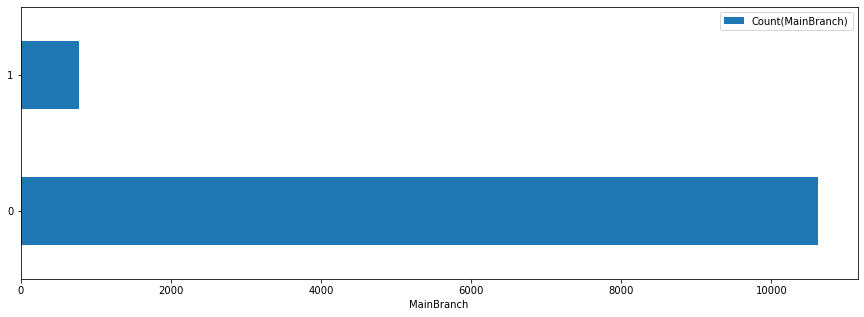

In [95]:
# horizontal bar chart using column MainBranch.
QUERY = """
SELECT MainBranch, Count(MainBranch)
FROM master
GROUP BY MainBranch
"""
df_Branch = pd.read_sql_query(QUERY,conn)
df_Branch.head()
df_Branch.plot(kind='barh',figsize=(15,5))
plt.xlabel('MainBranch')

Close the database connection.


In [96]:
conn.close()